# ANALYSIS AND PREDICTION OF INCOME IN US 

### Problem Statement: To predict adult salary as >50k or <=50k based on given attributes using Machine learning Classification algorithms



### Features
1. <b>Age: </b> Age of a Person
2. <b>Working Class:</b> Working class of a person such as Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
3. <b>Final Weight:</b> The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian noninstitutional population of the US.
4. <b>Education level:</b> Education level of person such as Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
5. <b>Education Number:</b> Mapped numbers based on education level
6. <b>Marital Status:</b> Marital Status of a person such as Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
7. <b>Occupation:</b> Occupation of a person such as Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
8. <b>Relationship Status:</b> Relationship of a person and it can be any of Wife, Own-child, Husband, Not-in-family, Other-relative and Unmarried. 
9. <b>Race:</b> Race of a person such as White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
10. <b>Sex:</b> Sex of a person, whcih is either Female or Male. 
11. <b>Capital Gain:</b> Capital gain and has continuous values.
12. <b>Capital Loss:</b> Capital loss and has continuous values.
13. <b>Hours-per-week:</b> Hours per week and continuous values. 
14. <b>Native Country:</b> Native Country of the person which can be in the list: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
15. <b>Class:</b> Lebels either '>50K' or '<=50K'

## Data Pipeline

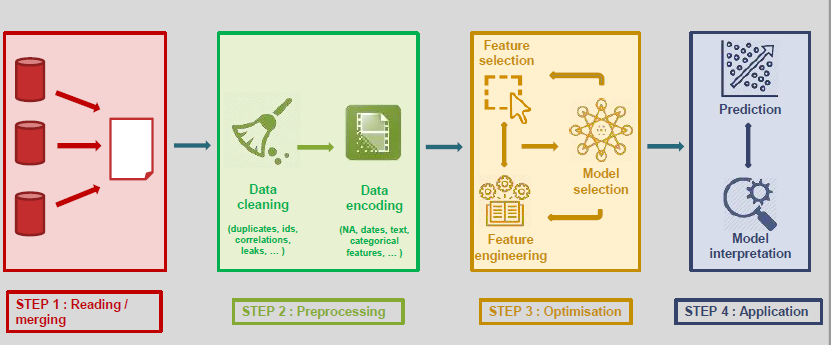

In [1]:
from IPython.display import Image
Image(filename='./pipeline.png') 

The image depicts the different stages of the pipeline of machine learning process. We will discuss all of them in detail.<br/>
<b>Reading Data:</b> This data is picked from UCI data repository. <br/>
<b>Data Cleaning:</b> There were no missing values in the data in the first look but we dive deeper we see that a lot of values are ? in the various columns. All these columns contain categorical values. So these ? are treated as missing data and rows that contain these values are removed from the dataset.<br/>
<b>Data Encoding:</b> Since most of the columns contain categorical values thus to use them in the machine learning algorithm we need to convert them into a discreet numerical value. For this purpose, we are using two methods.
    <ol><li>Using the map to define numerical value for each unique entry in the column. This was done for the columns with less number of unique values like Marital status, Gender in our dataset.</li>
    <li>Using the Label Encoder, where the algorithm defines a discreet value for every unique entry in that column. In our dataset, we used this for features like Occupation and working class.</li>
    </ol>
<b>Feature selection / Engineering:</b> It is very important for a machine-learning algorithm to achieve the right feature as input to achieve maximum accuracy. In our project, we implemented various data exploratory charts to see how the values in a dataset are distributed and how each feature is related to our target i.e. salary class. We have removed a few columns from our dataset as they had a little relation with our target or were Collinear with columns.<br/>
<b>Model selection:</b> To solve our classification problem, we chose multiple algorithms to predict our target class. We did Logistic regression classification, then we implemented the Ensemble models to improve the accuracy of our predictor. To implement <u>Bagging </u> we did Random forest algorithm and for <u>Boosting</u> we have implemented Gradient boosting and XGboosting algorithm.<br/>
<b>Model Interpretation:</b> After we have been done with our modeling, we pickle all our algorithms and unpickling them to see who provides the highest accuracy. We can implement the model with the highest accuracy to a front-end application and used it to provide a run-time prediction. 


In [2]:
#import pandas and numpy libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# To ignore warning messages
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Library to dump pk file 
import joblib

## Library to split the data into train and test data
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

# roc curve and auc score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
## import methods for score calculation and analyze the classification report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, precision_score, recall_score


In [4]:
# Read the csv and assign column names into a dataframe
data = pd.read_csv("adultdata.csv", names = ['Age','Working Class','Final Weight','Education level','Education Number',
                                            'Marital Status','Occupation','Relationship Status','Race','Sex',
                                            'Capital Gain','Capital Loss','Hours-per-week','Native Country','Class'])

In [5]:
data.head()

,Age,Working Class,Final Weight,Education level,Education Number,Marital Status,Occupation,Relationship Status,Race,Sex,Capital Gain,Capital Loss,Hours-per-week,Native Country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data.tail()

,Age,Working Class,Final Weight,Education level,Education Number,Marital Status,Occupation,Relationship Status,Race,Sex,Capital Gain,Capital Loss,Hours-per-week,Native Country,Class
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
# check the datatype of all attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age                    32561 non-null int64
Working Class          32561 non-null object
Final Weight           32561 non-null int64
Education level        32561 non-null object
Education Number       32561 non-null int64
Marital Status         32561 non-null object
Occupation             32561 non-null object
Relationship Status    32561 non-null object
Race                   32561 non-null object
Sex                    32561 non-null object
Capital Gain           32561 non-null int64
Capital Loss           32561 non-null int64
Hours-per-week         32561 non-null int64
Native Country         32561 non-null object
Class                  32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
print("Number of records/rows in the dataset are: " + str(len(data)))
print("Number of columns in the dataset are: " + str(len(data.columns)))
data.shape

Number of records/rows in the dataset are: 32561
Number of columns in the dataset are: 15


(32561, 15)

# Data Cleaning

In [9]:
#Check if any nan
data.isna().any()

Age                    False
Working Class          False
Final Weight           False
Education level        False
Education Number       False
Marital Status         False
Occupation             False
Relationship Status    False
Race                   False
Sex                    False
Capital Gain           False
Capital Loss           False
Hours-per-week         False
Native Country         False
Class                  False
dtype: bool

There are no nas in the dataset

In [10]:
# Check if there are any duplicate records, if there are any then drop them
print("Number of duplicate records are : " + str(data.duplicated().sum()))
data = data.drop_duplicates()
print("After dropping with duplicate records remaining number of records left are: " + str(len(data)))


Number of duplicate records are : 24
After dropping with duplicate records remaining number of records left are: 32537


In [11]:
## There are few ? missing values
missing_values = len(data[(data['Working Class'] == ' ?') | (data['Occupation'] == ' ?') | (data['Native Country'] == ' ?')])
print ("Number of missing values are: "+ str(missing_values))

Number of missing values are: 2398


In [12]:
## Drop records with missing values.
print("Total number of records : " +str(len(data)))
index_drop = data[(data['Working Class'] == '?') | (data['Occupation'] == ' ?')  | (data['Native Country'] == ' ?')].index

data.drop(index_drop, inplace = True)

print("After dropping with missing values remaining number of records left are: " + str(len(data)))



Total number of records : 32537
After dropping with missing values remaining number of records left are: 30139


# Exploratory Data Analysis

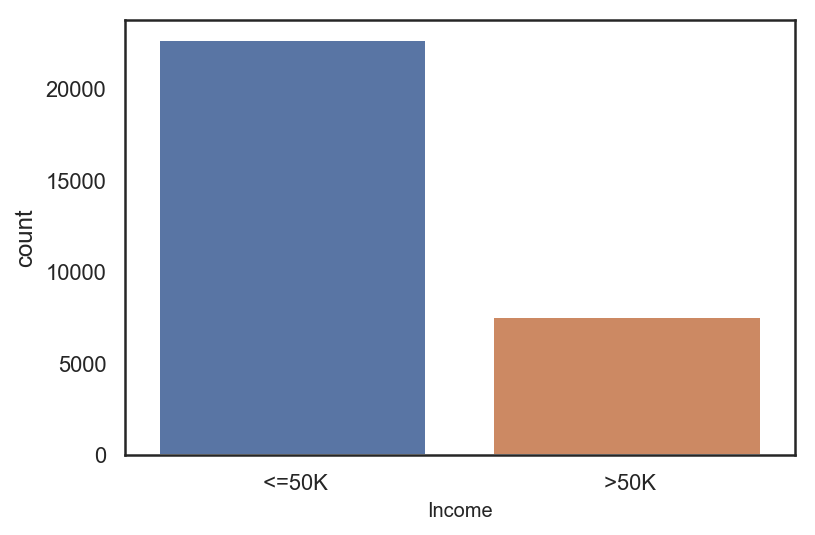

In [13]:
# The below chart shows the count of the target class.
sns.countplot(x='Class', data=data)
plt.xlabel("Income", fontsize = 10)
plt.show()

Interpretation: The dataset is imbalanced, with ~75% of data for income <50k and ~25% of data for income >50k

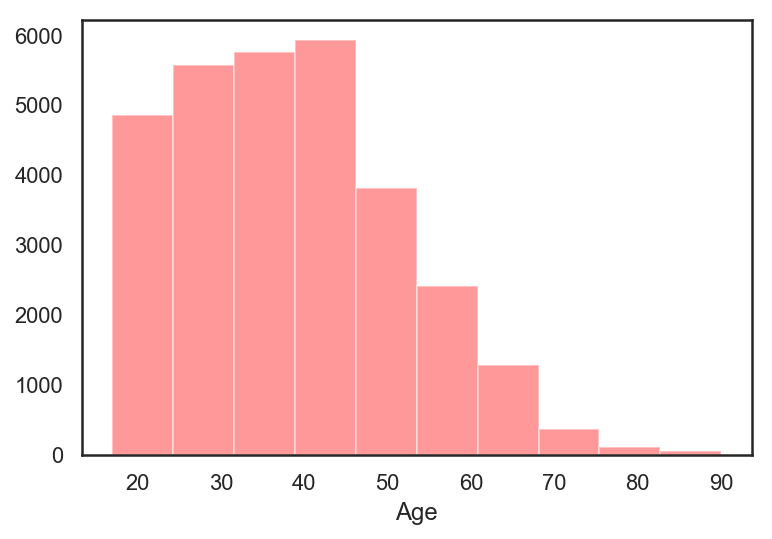

In [14]:
# Understanding the distribution of age in the dataset
sns.distplot(data['Age'], kde= False, color = 'red', bins=10)

Interpretation:
The age column is distributed between ages 20-90 years. Major portion of the data is for ages 20-50 years.

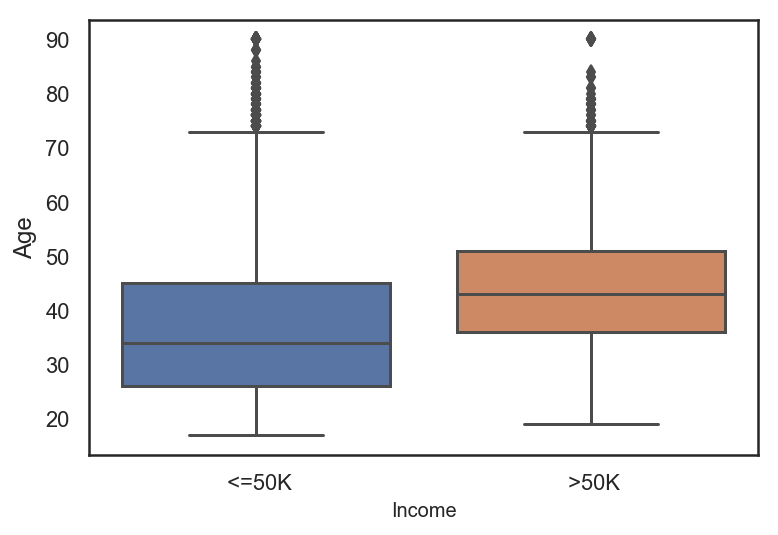

In [15]:
# The below boxplot is to understand the distribution of income vs age
sns.boxplot(x='Class',y='Age', data= data)
plt.xlabel("Income", fontsize = 10)
plt.show()

Interpretation:
From the above boxplot we can see that people of age 25-45 earn salary of <=50k, the major portion of it falling between the age 35-45.
People making salary of >50k fall in the range 36-50 years.
The dataset has few outliers for both the classes.

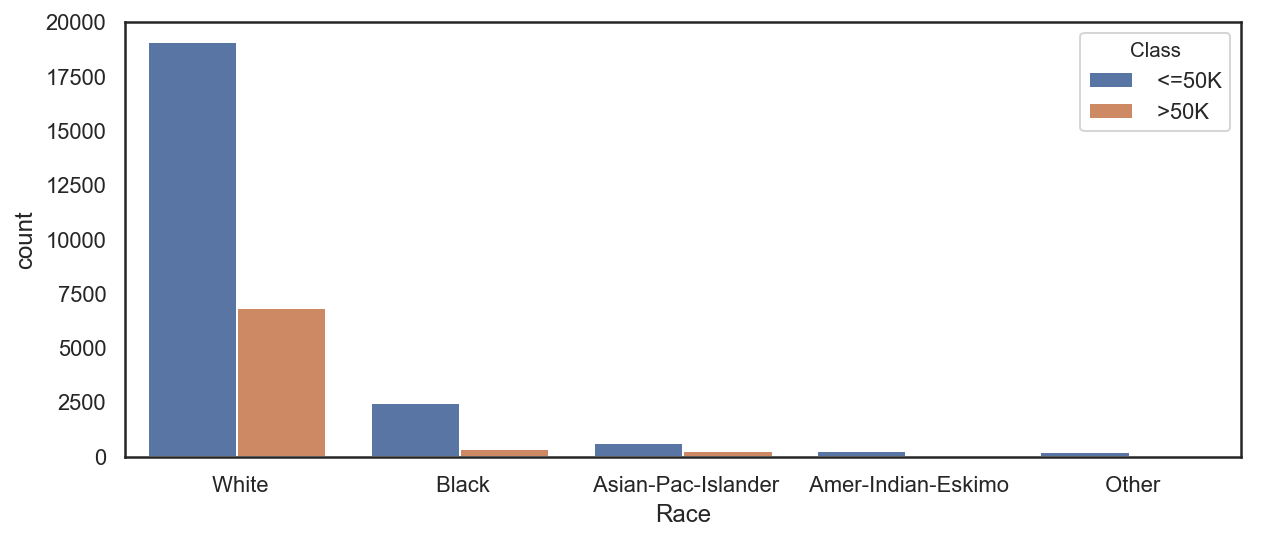

In [16]:
# The below count plot is to understand the distribution of the 'Race' column in the dataset
plt.figure(figsize=(10,4))
sns.countplot(x='Race', hue='Class', data=data)
plt.show()

Interpretation: The 'white' race occupies major portion of the dataset, followed by 'black' and 'asian'.

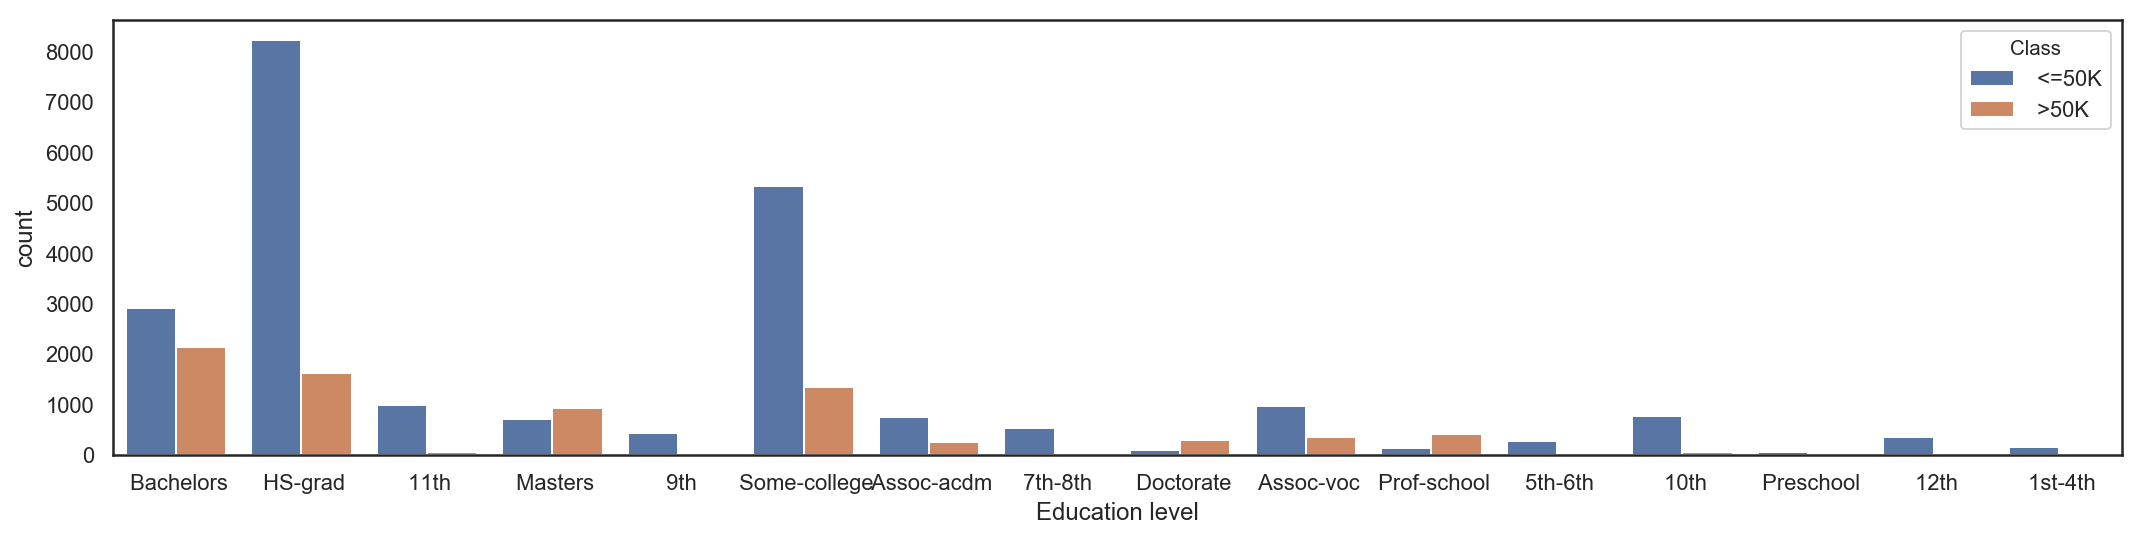

In [17]:
# The below plot is to understand the distribution of column 'Education Level'
plt.figure(figsize=(18,4))
sns.countplot(x='Education level', hue='Class', data=data)
plt.show()

Interpretation:
Majority of the samples have education level of 'HighSchool' graduation and they earn <=50k, next is followed by 'Bachelors' and 'College' People earning >50k fall into the categories of Bachelors, HS-grad, Masters, Doctorate. 

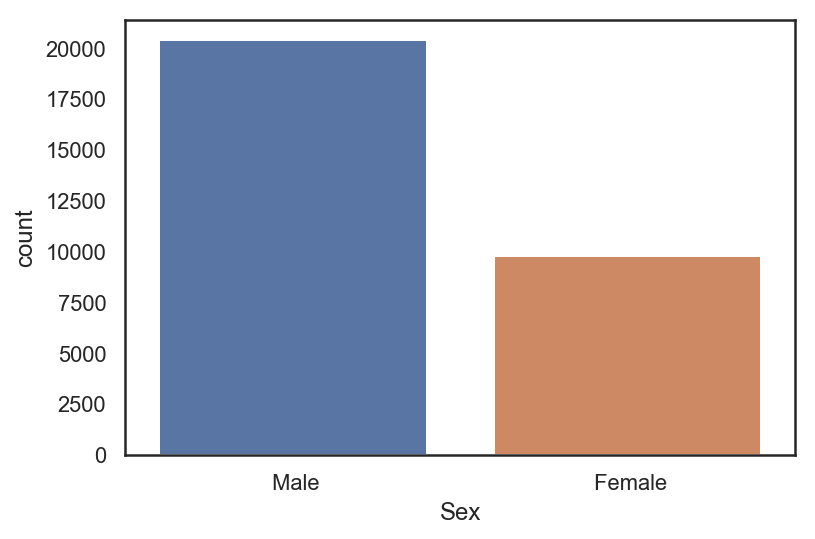

In [18]:
# The below plot is see a count of Male and Female in the dataset.
sns.countplot(x='Sex', data=data)

Interpretation: The count of Male is higher then Female.  

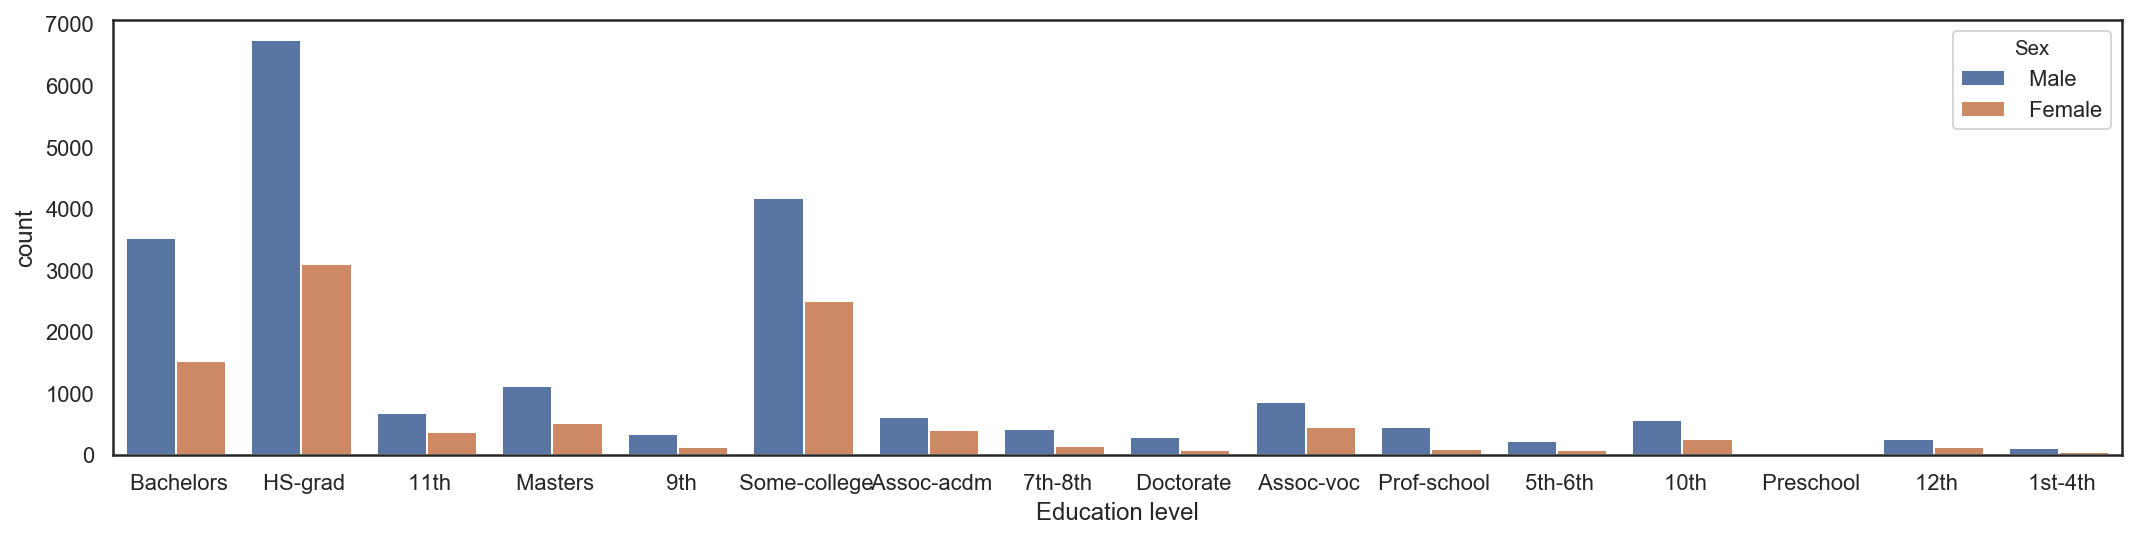

In [19]:
# The below plot is to understand the distribution of column 'Education Level' for gender - Male/Female
plt.figure(figsize=(18,4))
sns.countplot(x='Education level', hue='Sex', data=data)
plt.show()

Interpretation: We can see that the count of Males under Education Level is higher than Females, this is because the count of male is higher as per the preceeding chart. However, we can also see that the count of females is higher in the categories like 'Bachelors', 'HS-grad' and 'College', which can be interpretated as slightly higher level of education.  

<Figure size 1296x288 with 0 Axes>

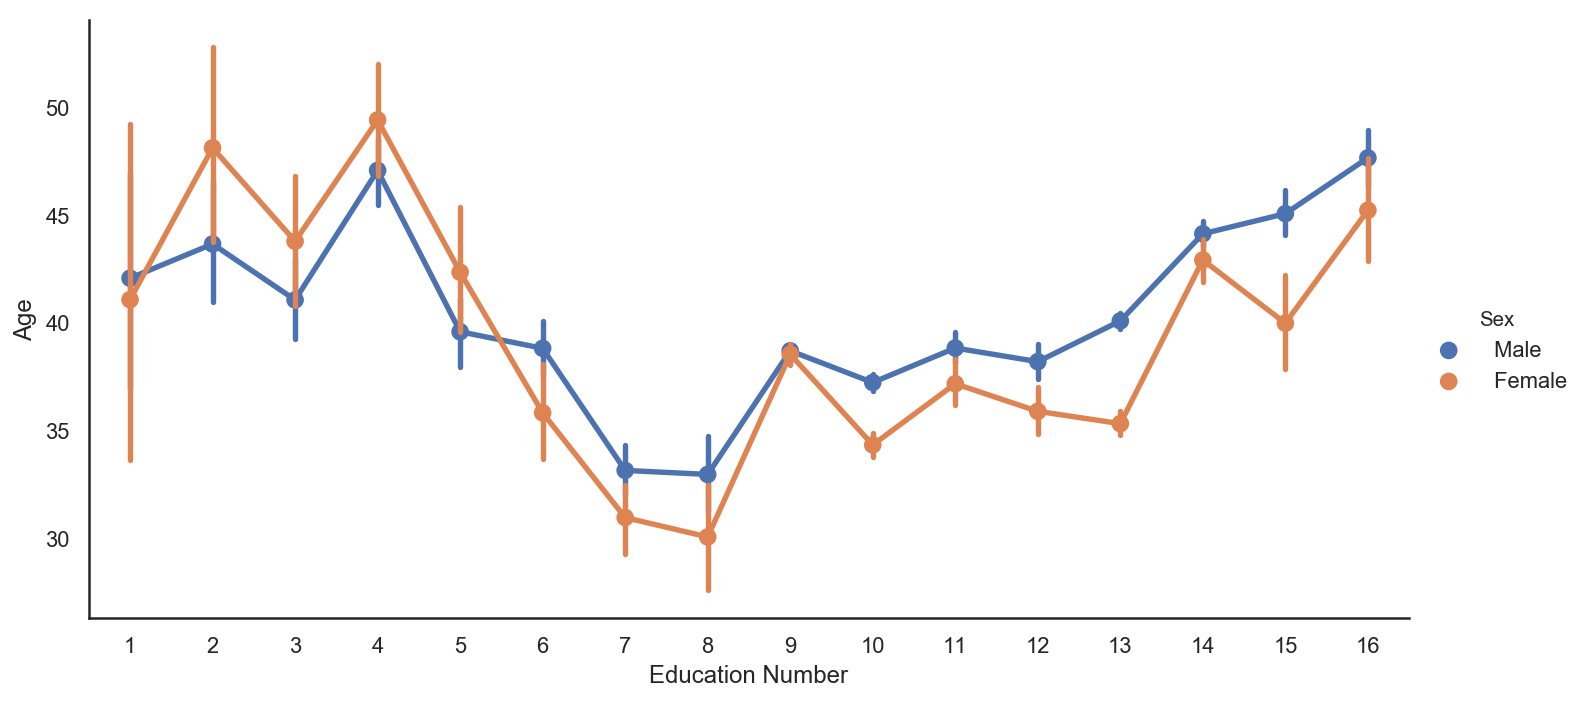

In [20]:
# The below plot is to understand the distribution of 'Education Number' vs 'Age' for the male/female category
plt.figure(figsize=(18,4))
sns.catplot(x='Education Number',y='Age',data=data, hue='Sex', kind='point', height=5, aspect=2)
plt.show()

Interpretation:
The trend between male and female in 'Education Number' vs 'Age' is similar. 
We can see that people of age between 40-60 fall in the lower education numbers, representing slightly older generation. But highest education number is also held by people of age 40-50.
For people in the age group 25 - 35, the education number increases.

<Figure size 720x288 with 0 Axes>

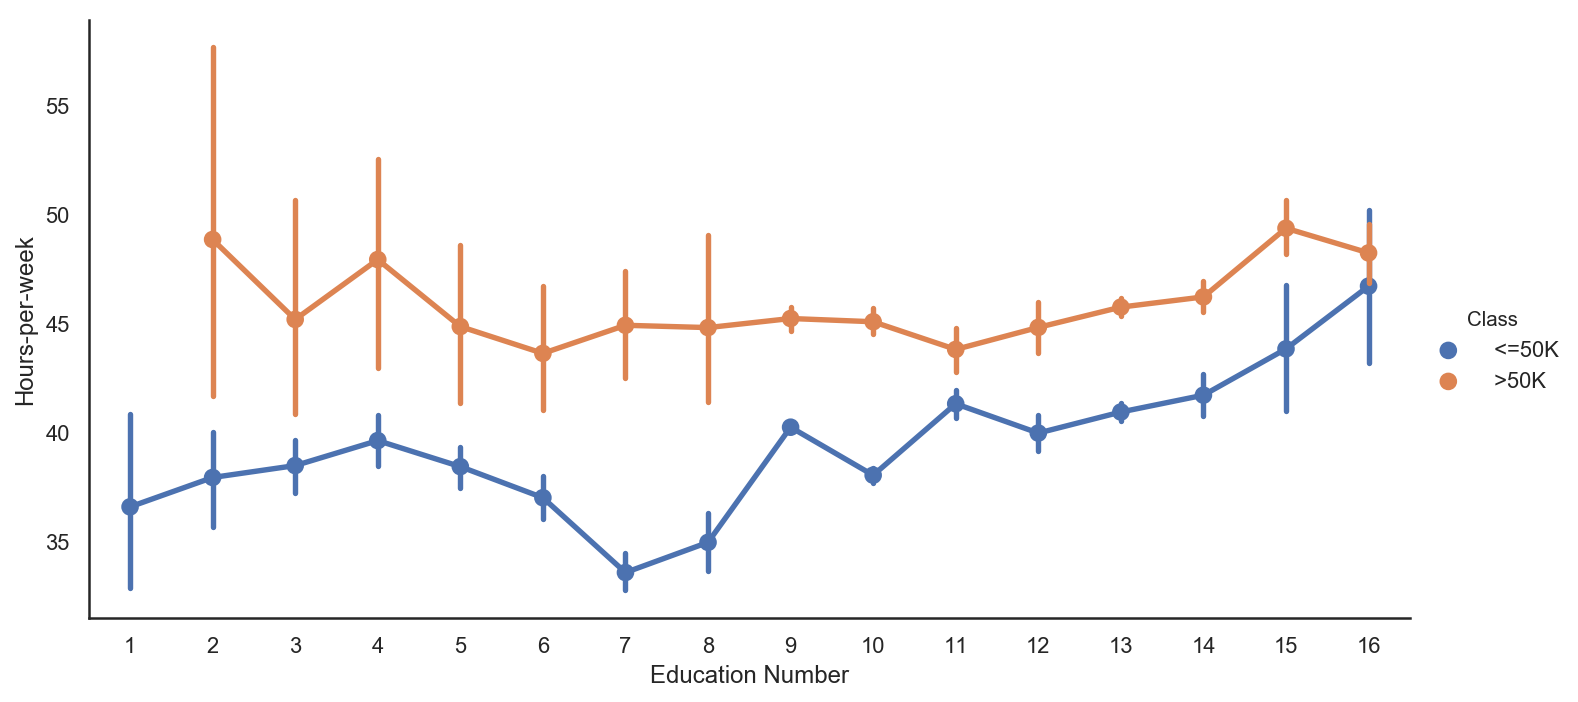

In [21]:
# The below plot is to understand the distribution of 'Education Number' vs 'Hours-per-week' for the income category
plt.figure(figsize=(10,4))
sns.catplot(x='Education Number',y='Hours-per-week',data=data, kind='point', hue='Class', height=5, aspect=2)
plt.show()

Interpretation: From the trend we can see that people earning >50k work more number of hours-per-week when compared to people earning <50k, this is true regardless of thier education level/number.
We can also see a trend of more number of hours for higher education levels but still earning <=50k

# Data preparation

In [22]:
# Mapping the Class column to 0 and 1

print("Unique values in the target/label column are: " + str(data.Class.unique()))
classMap = {' <=50K':0,' >50K':1}

data['Class'] = data['Class'].map(classMap)


Unique values in the target/label column are: [' <=50K' ' >50K']


In [23]:

print("Unique values in the Sex column are: " + str(data.Sex.unique()))

# Mapping the Sex column to 0 and 1

SexMap = {' Male':0, ' Female':1}

data['Sex'] = data['Sex'].map(SexMap)


Unique values in the Sex column are: [' Male' ' Female']


In [24]:
print("Unique values in the Race column are: \n\n" + str(data.Race.unique()))

# Mapping the Race column to 0, 1, 2, 3 and 4

RaceMap = {' White':0, ' Black':1, ' Asian-Pac-Islander' : 2, ' Amer-Indian-Eskimo' : 3, ' Other': 4}

data['Race']  = data['Race'].map(RaceMap)


Unique values in the Race column are: 

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']


In [25]:
#Check unique values in Marital status column

print("Unique values in the Marital Status column are: \n\n" + str(data['Marital Status'].unique()))

# Change values of Married-* to married and remaining to Single category

data["Marital Status"] = data["Marital Status"].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], 'Married')
data["Marital Status"] = data["Marital Status"].replace([' Never-married',' Divorced',' Separated',' Widowed'], 'Single')

# Mapping the Marital Status column to 0 and 1

data["Marital Status"] = data["Marital Status"].map({"Married":0, "Single":1})

Unique values in the Marital Status column are: 

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


In [26]:
# After mapping values the data looks as below:
data.head()

,Age,Working Class,Final Weight,Education level,Education Number,Marital Status,Occupation,Relationship Status,Race,Sex,Capital Gain,Capital Loss,Hours-per-week,Native Country,Class
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,Not-in-family,0,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,Husband,0,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,Not-in-family,0,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,0,Handlers-cleaners,Husband,1,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,0,Prof-specialty,Wife,1,1,0,0,40,Cuba,0


In [27]:
print("Unique values in the working class column are: \n\n" + str(data['Working Class'].unique()))

Unique values in the working class column are: 

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']


In [28]:
print("Unique values in the Occupation column are: \n\n" + str(data['Occupation'].unique()))

Unique values in the Occupation column are: 

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']


In [29]:
### Lets use encoding for working class and Occupation column

# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

working_class_encoded=le.fit_transform(data['Working Class'])

print("Working Class column after encoding looks like: " + str(working_class_encoded))

Occupation_encoded = le.fit_transform(data['Occupation'])

print("Occupation column after encoding looks like: " + str(Occupation_encoded))



Working Class column after encoding looks like: [5 4 2 ... 2 2 3]
Occupation column after encoding looks like: [0 3 5 ... 0 0 3]


In [30]:
print("Unique values in the Native Country column are: \n\n" + str(data['Native Country'].unique()))


Unique values in the Native Country column are: 

[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' ' Columbia' ' Cambodia' ' Thailand' ' Ecuador' ' Laos'
 ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic' ' El-Salvador'
 ' France' ' Guatemala' ' Italy' ' China' ' South' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


In [31]:
data.head()

,Age,Working Class,Final Weight,Education level,Education Number,Marital Status,Occupation,Relationship Status,Race,Sex,Capital Gain,Capital Loss,Hours-per-week,Native Country,Class
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,Not-in-family,0,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,Husband,0,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,Not-in-family,0,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,0,Handlers-cleaners,Husband,1,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,0,Prof-specialty,Wife,1,1,0,0,40,Cuba,0


In [32]:
# Lets check the data correlation to see which feature is important
data.corr()

,Age,Final Weight,Education Number,Marital Status,Race,Sex,Capital Gain,Capital Loss,Hours-per-week,Class
Age,1.000000,-0.076279,0.043203,-0.310420,-0.035495,-0.081827,0.080162,0.060141,0.101348,0.242017
Final Weight,-0.076279,1.000000,-0.045199,0.027832,0.002221,-0.025602,0.000420,-0.009755,-0.023033,-0.008992
Education Number,0.043203,-0.045199,1.000000,-0.071567,-0.043280,-0.006049,0.124455,0.079613,0.152842,0.335413
Marital Status,-0.310420,0.027832,-0.071567,1.000000,0.055918,0.426304,-0.082598,-0.078572,-0.221390,-0.436044
Race,-0.035495,0.002221,-0.043280,0.055918,1.000000,0.067722,-0.010191,-0.021937,-0.037609,-0.067937
Sex,-0.081827,-0.025602,-0.006049,0.426304,0.067722,1.000000,-0.048819,-0.047008,-0.231126,-0.216668
Capital Gain,0.080162,0.000420,0.124455,-0.082598,-0.010191,-0.048819,1.000000,-0.032255,0.080429,0.221204
Capital Loss,0.060141,-0.009755,0.079613,-0.078572,-0.021937,-0.047008,-0.032255,1.000000,0.052380,0.150026
Hours-per-week,0.101348,-0.023033,0.152842,-0.221390,-0.037609,-0.231126,0.080429,0.052380,1.000000,0.229435
Class,0.242017,-0.008992,0.335413,-0.436044,-0.067937,-0.216668,0.221204,0.150026,0.229435,1.000000


#### As a part of feature engineering, we have ignored following columns 
<p>Native country (Race is already considered) </p>
<p>Relationship status (marital status is considered) </p>
<p>Education level (the education number column is mapped to education level and is considered)</p>
<p>Final Weight because it's correlation with the Class is very negligible</p>

In [33]:
# Collect encoded lists and columns for classification
features = list(zip(working_class_encoded, Occupation_encoded, data['Age'], data['Education Number'],\
                                                                   data['Marital Status'], data['Race'],data['Sex'], \
                                                                   data['Capital Gain'], data['Capital Loss'], data['Hours-per-week']))

## Convert features into a dataframe from the list, because few classifier algorithms are using dataframes as an input

# Assign values of X as features and Y as a target / labels
feauture_columns = ['working_class', 'occupation', 'Age', 'Education_Number', 'Marrital_Status',\
                                     'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week']

X = pd.DataFrame(features, columns = feauture_columns)

Y = data['Class']


In [34]:

print("\nFeatures considered for classification are as follows: \n\n" )
print(X.head())

print("\n\nWhere values for each (encoded/mapped) column are in the range of: \n")

print("working_class: \tmin value is "  + str(X.working_class.min()) + " and max: " + str(X.working_class.max()))
print("Occupation: \tmin value is "  + str(X.occupation.min()) + " and max: " + str(X.occupation.max()))
print("Age: \t\tmin value is "  + str(X.Age.min()) + " and max: " + str(X.Age.max()))
print("Education_Number:\t min value is "  + str(X.Education_Number.min()) + " and max: " + str(X.Education_Number.max()))
print("Marrital_Status: \tmin value is "  + str(X.Marrital_Status.min()) + " and max: " + str(X.Marrital_Status.max()))
print("Race: \t\tmin value is "  + str(X.Race.min()) + " and max: " + str(X.Race.max()))
print("Sex: \t\tmin value is "  + str(X.Sex.min()) + " and max: " + str(X.Sex.max()))

print("Capital_Gain:\t min value is "  + str(X.Capital_Gain.min()) + " and max: " + str(X.Capital_Gain.max()))
print("Capital_Loss:\t min value is "  + str(X.Capital_Loss.min()) + " and max: " + str(X.Capital_Loss.max()))
print("Hours_per_week: \tmin value is "  + str(X.Hours_per_week.min()) + " and max: " + str(X.Hours_per_week.max()))


print("\n\n The labels looks like: \n" + str(Y.head()))


Features considered for classification are as follows: 


   working_class  occupation  Age  Education_Number  Marrital_Status  Race  \
0              5           0   39                13                1     0   
1              4           3   50                13                0     0   
2              2           5   38                 9                1     0   
3              2           5   53                 7                0     1   
4              2           9   28                13                0     1   

   Sex  Capital_Gain  Capital_Loss  Hours_per_week  
0    0          2174             0              40  
1    0             0             0              13  
2    0             0             0              40  
3    0             0             0              40  
4    1             0             0              40  


Where values for each (encoded/mapped) column are in the range of: 

working_class: 	min value is 0 and max: 6
Occupation: 	min value is 0 and max: 13
A

### Function to plot ROC-AUC 

In [35]:
##  ROC tells us how good the model is for distinguishing the given classes, in terms of the predicted probability.
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# Model Implementation

## Random Forest Classifier
Random Forest Classifier is an <b> Ensemble Algorithm </b>. This classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.

In [36]:
# Split the data into train and test in 80:20 proportion respectively

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.2, random_state=78)

In [37]:
y_test.value_counts()

0    4524
1    1504
Name: Class, dtype: int64

In [38]:
#import RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a model with number of trees in the forest 20, entropy criterion for information gain and maximum depth of 10
classifier = RandomForestClassifier(n_estimators=20, criterion='entropy', random_state=0, max_depth = 10)

# Fit the Training data into the model
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [39]:
# use the model for test data for prediction

y_pred = classifier.predict(X_test)

In [40]:
# Accuracy score for Random Forest model
print('Accuracy Score for Random Forest Model is : ', accuracy_score(y_test,y_pred))


Accuracy Score for Random Forest Model is :  0.8525215660252157


In [41]:
# Use hyper-parameters for tuning the model and see if it improves the accuracy.
# The parameters being tested are max_depth and n_estimators

rf = RandomForestClassifier()

parameters = {'max_depth': [2,4,10,15,100,200], 
              'n_estimators':[5,50,100,200,500]}


gridCV = GridSearchCV(rf, parameters, cv=5)

gridFitRF = gridCV.fit(X_train,y_train)


In [42]:
# Lets check the best estimator for this model
gridFitRF.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
gridFitRF.best_score_

0.8609348430177097

In [44]:
# Predict the salary for test data
y_pred = gridFitRF.predict(X_test)

In [45]:
# Check the confusion matrix for Logistic Regression Model 
cmRF = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cmRF)

Confusion Matrix
 [[4257  267]
 [ 565  939]]


In [46]:
# Check the Classification report for Logistic regression model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4524
           1       0.78      0.62      0.69      1504

   micro avg       0.86      0.86      0.86      6028
   macro avg       0.83      0.78      0.80      6028
weighted avg       0.86      0.86      0.86      6028



In [47]:
print('Accuracy Score for Random Forest Classifier after using hyper-parameters is: ', accuracy_score(y_test, y_pred))


Accuracy Score for Random Forest Classifier after using hyper-parameters is:  0.8619774386197744


### AUC (Area Under the Curve) and ROC (Receiver Operating Characteristics)

ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

In [48]:
# Lets check the AUC score for performance evaluation 

rf_auc = roc_auc_score(y_test, y_pred)

print('AUC: %.2f' % rf_auc)

AUC: 0.78


In [49]:
# Lets check the ROC score for performance evaluation 

rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_pred)

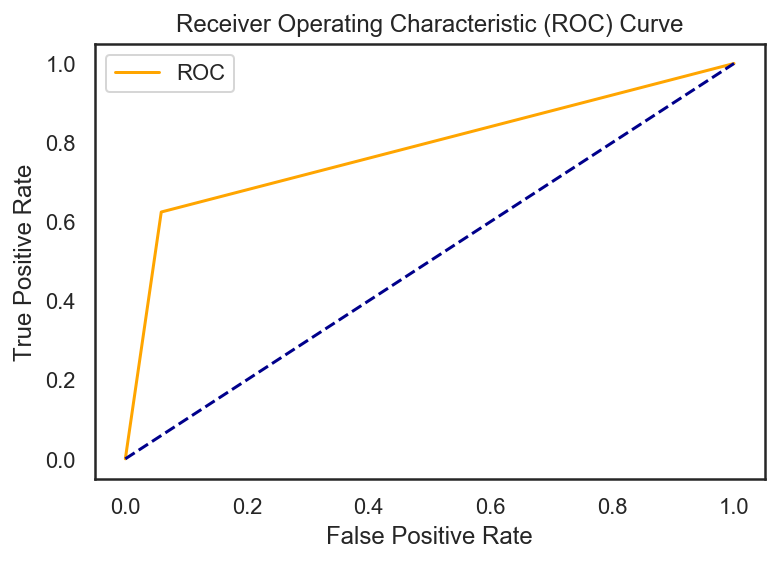

In [50]:

plot_roc_curve(rf_fpr, rf_tpr)


#### From the ROC curve seen above it is seen that Random forest classifier has almost 0.61 rate of predicting the correct output. This model has a decent ROC cruve.

In [51]:
joblib.dump(gridFitRF, 'RF_model.pkl')

['RF_model.pkl']

## Logistic Regression

Logistic Regression is a ‘Statistical Learning’ technique categorized in ‘Supervised’ Machine Learning (ML) methods dedicated to ‘Classification’ tasks. It has gained a tremendous reputation for last two decades especially in financial sector due to its prominent ability of detecting defaulters.

In [52]:
# import LogisticRegression from linear_model

from sklearn.linear_model import LogisticRegression


In [53]:
lr = LogisticRegression()

'''
User hyper parameter C which is used to inverse of regularization strength;  
Like in support vector machines, smaller values specify stronger regularization.
'''

parameters = {
    'C' : [0.001,0.01,1,10,100,1000]
}

gridCV = GridSearchCV(lr, parameters, cv=5)

#Fit the model for training data
gridLLFit = gridCV.fit(X_train, y_train)

In [54]:

print("Best estimator is : \n\n" + str(gridLLFit.best_estimator_))
print("\n\nCV Results are as follows: \n\n" + str(gridLLFit.cv_results_))

print ('\n\nBest Parameters: {} '.format(gridLLFit.best_params_))


Best estimator is : 

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


CV Results are as follows: 

{'mean_fit_time': array([0.08440681, 0.109093  , 0.14218807, 0.12567196, 0.11764555,
       0.10526576]), 'std_fit_time': array([0.01902165, 0.023528  , 0.02014399, 0.02297281, 0.00947488,
       0.00721003]), 'mean_score_time': array([0.00224152, 0.00146632, 0.00177851, 0.00143824, 0.00144763,
       0.00128894]), 'std_score_time': array([1.85865295e-03, 2.28065904e-04, 3.74414881e-04, 1.81841374e-04,
       3.42085496e-04, 4.79441682e-05]), 'param_C': masked_array(data=[0.001, 0.01, 1, 10, 100, 1000],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.001}, {'C': 0.01}, {'C': 1}, {'C': 10}, {'C':

In [65]:
# Use the model to predict class for test data

y_predLL = gridLLFit.predict(X_test)

In [66]:
# Check the confusion matrix for Logistic Regression Model 
cmLL = confusion_matrix(y_test, y_predLL)
print("Confusion Matrix\n", cmLL)

Confusion Matrix
 [[4198  326]
 [ 662  842]]


In [67]:
# Check the Classification report for Logistic regression model
print(classification_report(y_test, y_predLL))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4524
           1       0.72      0.56      0.63      1504

   micro avg       0.84      0.84      0.84      6028
   macro avg       0.79      0.74      0.76      6028
weighted avg       0.83      0.84      0.83      6028



In [68]:
print('Accuracy Score for Logistic Regression model: ', accuracy_score(y_test,y_predLL))

Accuracy Score for Logistic Regression model:  0.836098208360982


In [69]:
# Lets check the AUC  score for performance evaluation 
lr_auc = roc_auc_score(y_test, y_predLL)
print('AUC: %.2f' % lr_auc)

AUC: 0.74


In [70]:
# Lets check the ROC score for performance evaluation 
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, y_predLL)

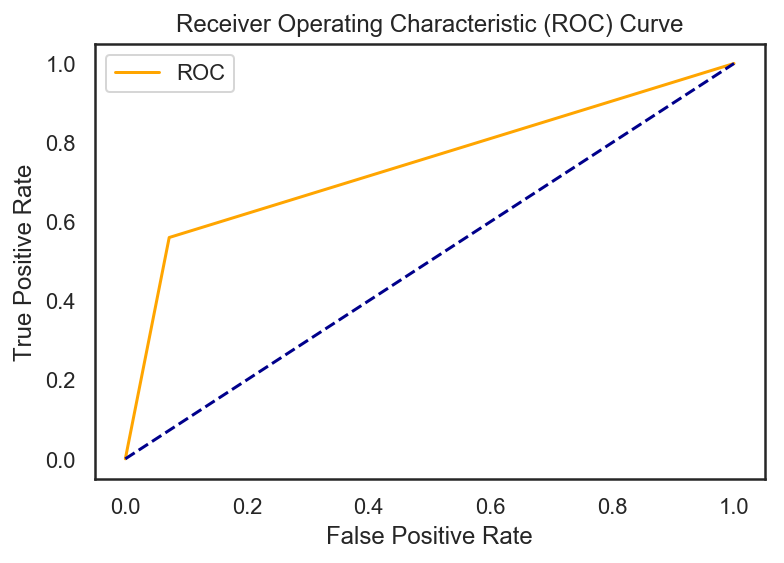

In [71]:
# Plot the ROC curve for Logistic Regression model
plot_roc_curve(lr_fpr, lr_tpr)

#### From the ROC curve above it is seen that the rate of predicting is  also around 0.58  which is less than that of Random Forest Classifier


In [72]:
# Create a pickle file for Logistic regression model
joblib.dump(gridLLFit, 'LR_model.pkl')

['LR_model.pkl']

## XGBoosting

XGBoost (Extreme Gradient Boosting) is a boosting algorithm based on Gradient Boosting Machines.  XGboost applies regularization technique to reduce overfitting, and it is one of the differences from the gradient boosting. 
Another advantage of XGBoost over classical gradient boosting is that it is fast in execution speed. It performs well in predictive modeling of classification and regression analysis.

In [73]:
# import the XGBClassifier from xgboost library
from xgboost import XGBClassifier


xgb = XGBClassifier()

# Use hyper-parameters to fit the model and give best estimator values
parameters = {
        'max_depth' : [5, 10, 15, 20],
        'n_estimators' : [5, 50, 100],
        'learning_rate' : [0.01, 0.1, 1]
}

gridCVXGb = GridSearchCV(xgb, parameters, cv=5)


In [74]:
# Fit the model for training data

gridFitXGb = gridCVXGb.fit(X_train, y_train)

In [75]:
# Predict class for test data
y_predGb = gridFitXGb.predict(X_test)


In [76]:
gridFitXGb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [77]:
cmGb=confusion_matrix(y_test, y_predGb)
print("Confusion Matrix\n", cmGb)

Confusion Matrix
 [[4262  262]
 [ 533  971]]


In [78]:
print(classification_report(y_test, y_predGb))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4524
           1       0.79      0.65      0.71      1504

   micro avg       0.87      0.87      0.87      6028
   macro avg       0.84      0.79      0.81      6028
weighted avg       0.86      0.87      0.86      6028



In [79]:
print('Accuracy Score for XGBoost is: ', accuracy_score(y_test, y_predGb))

Accuracy Score for XGBoost is:  0.8681154611811546


In [80]:
# Lets check the AUC  score for performance evaluation 
xgb_auc = roc_auc_score(y_test, y_predGb)
print('AUC: %.2f' % xgb_auc)

AUC: 0.79


In [81]:
# Lets check the ROC  score for performance evaluation 
xgb_fpr, xgb_tpr, thresholds = roc_curve(y_test, y_predGb)

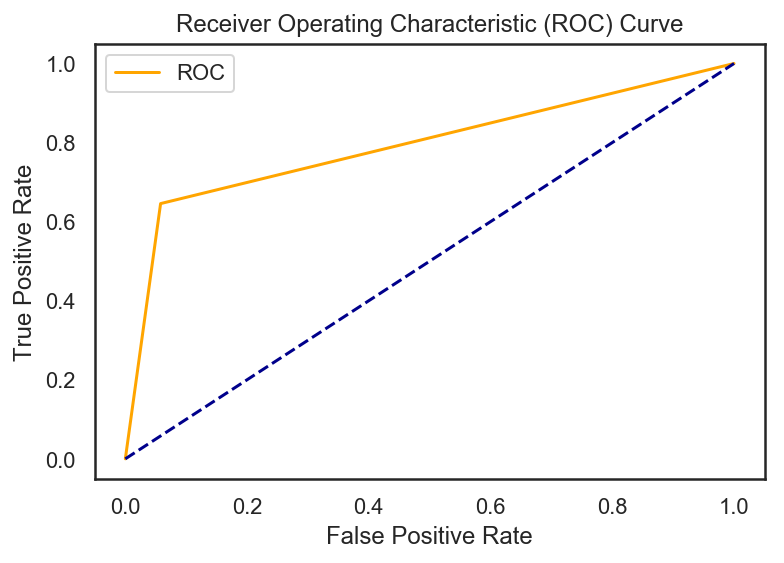

In [82]:
# Plot the ROC Curve for Extreme Boosting classifier
plot_roc_curve(xgb_fpr, xgb_tpr)

#### From the ROC curve above it is seen that the model has a rate of more than 0.6 which is closer to 1.0. this model predicts well.

In [83]:
# Create a pickle for XGBoost Model
joblib.dump(gridFitXGb, 'XGB_model.pkl')

['XGB_model.pkl']

## Gradient Boosting classification
Boosting tries to create a strong learner from an ensemble of weak learners. 

In [84]:
# import Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier


In [85]:
gb = GradientBoostingClassifier()

# Use Hyper parameters to improve the performance and check the best estimating hyper parameters
parameters = {
        'max_depth' : [5,7,9],
        'n_estimators' : [5,50,100,250],
        'learning_rate' : [0.01,0.1,1]
}

gridCVGb = GridSearchCV(gb, parameters, cv=5)

In [86]:
# Fit the model 
gridFitGb = gridCVGb.fit(X_train, y_train)

In [87]:
# Check the best estimator for Gradient Boosting model
gridFitGb.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [88]:
# Predict the class for test data using Gradient Boosting classifier
y_predGb = gridFitGb.predict(X_test)

In [79]:
# Lets check the confusion matrics 

cmGb=confusion_matrix(y_test, y_predGb)
print("Confusion Matrix for Gradient Boosting Classifier is: \n", cmGb)

Confusion Matrix for Gradient Boosting Classifier is: 
 [[4242  282]
 [ 509  995]]


In [80]:
print(classification_report(y_test, y_predGb))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4524
           1       0.78      0.66      0.72      1504

    accuracy                           0.87      6028
   macro avg       0.84      0.80      0.82      6028
weighted avg       0.86      0.87      0.87      6028



In [81]:
print('Accuracy Score for Gradient Boosting Classifier is : ', accuracy_score(y_test,y_predGb))

Accuracy Score for Gradient Boosting Classifier is :  0.8687790311877903


In [82]:
# Calculate the AUC score for Gradient boosting classifier
gb_auc = roc_auc_score(y_test, y_predGb)
print('AUC: %.2f' % gb_auc)

AUC: 0.80


In [83]:
# Calculate ROC curve for Gradient Boosting classifier
gb_fpr, gb_tpr, thresholds = roc_curve(y_test, y_predGb)

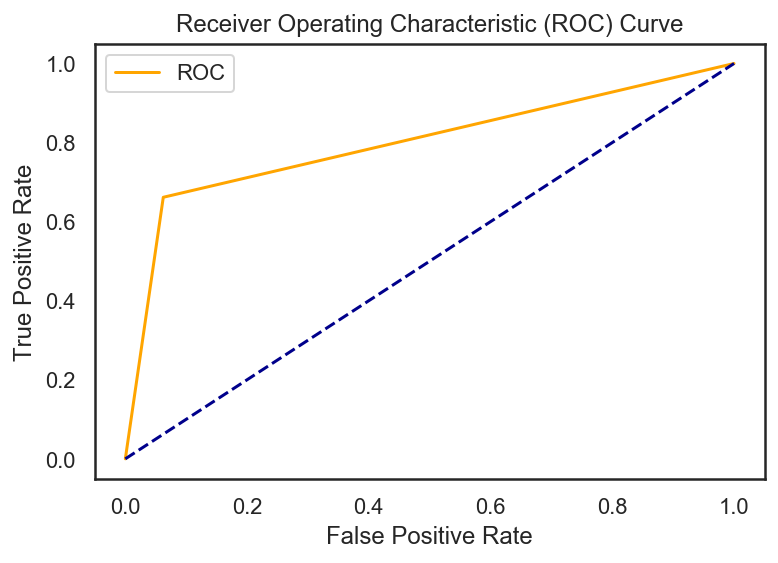

In [84]:
# Plot the ROC curve for Gradient Boosting Classifier
plot_roc_curve(gb_fpr, gb_tpr)

#### From the ROC curve above it is seen that the model has a rate of more than 0.6 which is closer to 1.0. this model predicts well.

In [85]:
# Create a pickle for Gradient boosting algorithm
joblib.dump(gridFitGb, 'GB_model.pkl')

['GB_model.pkl']

# Identifying the best algorithm for the problem

In [86]:
# Below are the pickle files -
# LR: LR_model.pkl
# RF: RF_model.pkl
# GB: GB_model.pkl
# XGB: XGB_model.pkl

In [87]:
# Loading all the pickle files into dict models. 'models' consist of the name and the model
models = {}

for mdl in ['LR','RF','GB','XGB']:
    models[mdl] = joblib.load('{}_model.pkl'.format(mdl))
    

In [88]:
from time import time

# The inputs for the below function are: name, model, features and labels. 
# This function captures the start and end time of predictions by the model and displays the accuracy, 
# precision and recall contributed by the models.
def evaluate_model(name, model, features, labels):
    # to capture the start time of prediction by the model
    start = time()
    # prediction on the features by different models
    predictions = model.predict(features)
    # to capture the end time of prediction by the model
    end = time()
    # to capture the accuracy, precision and recall executed by the models
    accuracy = round(accuracy_score(labels, predictions), 3)
    precision = round(precision_score(labels, predictions), 3)
    recall = round(recall_score(labels, predictions), 3)
    print('\n{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [89]:
# Lets check model items which are best estimators for classifiers.
for k, v in models.items():
    print (k,"-------", v)

LR ------- GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
RF ------- GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
          

In [90]:
for name, value in models.items():
    evaluate_model(name, value, X_test, y_test)


LR -- Accuracy: 0.836 / Precision: 0.721 / Recall: 0.56 / Latency: 5.1ms

RF -- Accuracy: 0.864 / Precision: 0.781 / Recall: 0.632 / Latency: 317.1ms

GB -- Accuracy: 0.869 / Precision: 0.779 / Recall: 0.662 / Latency: 37.8ms

XGB -- Accuracy: 0.868 / Precision: 0.788 / Recall: 0.646 / Latency: 32.6ms


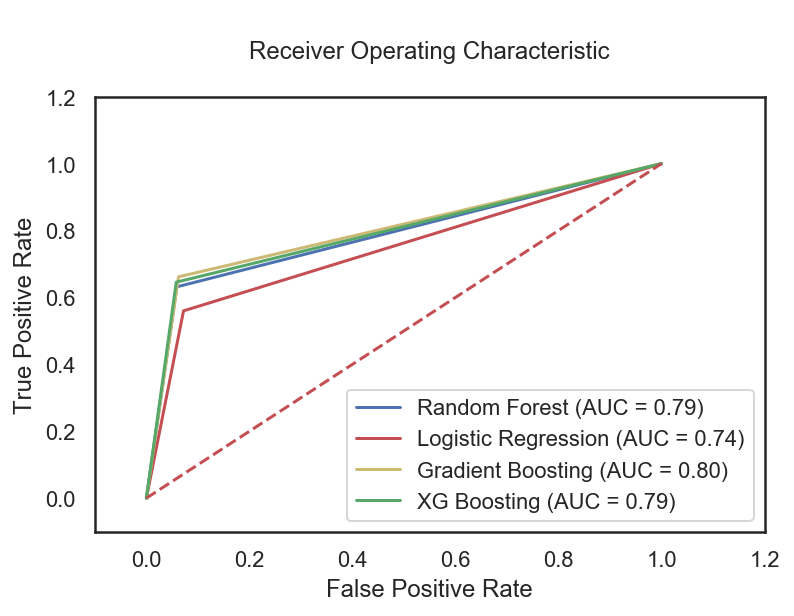

In [91]:
# Lets check the ROC for all models together
plt.title('\nReceiver Operating Characteristic\n')

plt.plot(rf_fpr, rf_tpr, 'b',label='Random Forest (AUC = %0.2f)'% rf_auc)
plt.plot(lr_fpr, lr_tpr, 'r',label='Logistic Regression (AUC = %0.2f)'% lr_auc)
plt.plot(gb_fpr, gb_tpr, 'y',label='Gradient Boosting (AUC = %0.2f)'% gb_auc)
plt.plot(xgb_fpr, xgb_tpr, 'g',label='XG Boosting (AUC = %0.2f)'% xgb_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROCplot.png',dpi= 300)
plt.show()


<p>Higher the AUC, better the model at predicting 0s as 0s and 1s as 1s. </p>
<p>Hence as shown, AUC for Gradient boosting and Extreme boosting algorithm is higher and hence these are the best performing classifiers.  </p>

## Prediction for new test data using the best model - XGB

In [92]:
# Dummy data:
# working_class = 2
# Occupation = 3
# Age = 51
# Education Number = 13
# Married_Status = 0
# Race = 0
# Sex = 0
# Capital_Gain = 5178
# Capital_Loss = 0
# Hours_per_week = 60

In [93]:
features_new = [2,3,51,13,0,0,0,5178,0,60]

In [94]:
X_new = pd.DataFrame(data=[features_new], columns = feauture_columns)

In [95]:
X_new

,working_class,occupation,Age,Education_Number,Marrital_Status,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week
0,2,3,51,13,0,0,0,5178,0,60


In [96]:
y_predGbNew = gridFitXGb.predict(X_new)

In [97]:
y_predGbNew

array([1])

Our model has predicted the person earns >50k

# Summary

In this project, we aimed to predict person's salary based on variables like working_class, Occupation, Age,
Education_Number, Marrital_Status, Race, Sex, Capital_Gain, Capital_Loss and Hours_per_week.

Several classification models were tested for prediction accuracy and we determined that the Boosting models gave  the highest accuracy among others.
#### The Gradient Boosting and XGBoosting classifer gave the best accuracy score of 86.9% and 86.8% respectively along with higher AUC value compared to others.
##### Random Forest, Logistic Regression, Gradient boosting and Extreme Gradient Boosting classification algorthims for our dataset
As only 27% of our data’s labels were >50K (This pattern could be attributed the uneven sample distribution, i.e. Unbalanced Dataset), boosting helped predict well for both the labels. Accuracy score for Random Forest, Logistic Regression varies from 83.6% to 86.3%. 


##### References:
Dataset Resource:  https://archive.ics.uci.edu/ml/datasets/Census+Income
